In [3]:
# python program to create a simple Quantum circuit
  
  
%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
  

In [4]:
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-01-12 22:20:47,240: Credentials are already in use. The existing account in the session will be replaced.


In [5]:
# Create a Quantum Circuit acting
# on the q register
circuit = QuantumCircuit(2, 2)

In [6]:
# Add a H gate on qubit 0
circuit.h(0)

In [7]:
# Add a CX (CNOT) gate on control 
# qubit 0 and target qubit 1
circuit.cx(0, 1)

In [8]:
# Map the quantum measurement to the
# classical bits
circuit.measure([0,1], [0,1])

In [9]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

In [10]:
# Execute the circuit on the qasm
# simulator
job = execute(circuit, simulator, shots=1000)

In [11]:
# Grab results from the job
result = job.result()

In [14]:
# Return counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'00': 509, '11': 491}


In [13]:
# Draw the circuit
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

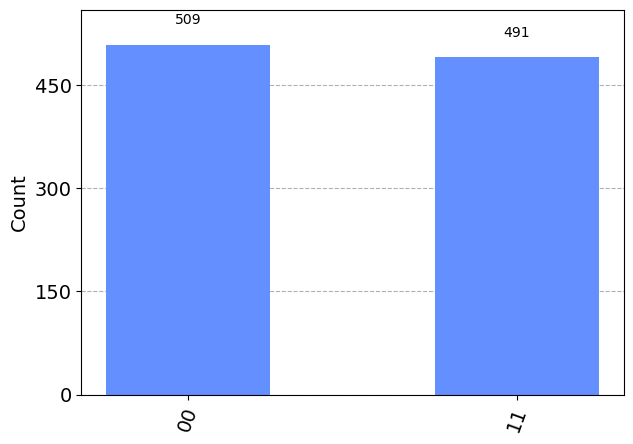

In [15]:
# Plot a histogram
plot_histogram(counts)